# Video Game Popularity: Preprocessing and Training

The goal of this notebook is to prepare data for fitting model developement.

We will be creating dummy variable for our categorical data. We did some of this in the EDA notebook, but only for certain columns as it was too large for visualizing. We will also need the version of the Steam Tags data set, where we converted it to boolean rather than counts, recall our threshold for determining this was 75% of the maximum of the tags for each video games.


In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns


import requests
import numpy as np
import matplotlib.pyplot as plt

We saw in EDA that our first data set wasn't as informative as the other two data sets, so here we plan to focus on those two instead. So to start off let's look at:

## 2016 Video Game Sales

In this set, we filtered "most popular" games by sales, and then we saw a corrilation between sales and critic scores

In [2]:
vg_sales_2016_w_scores = pd.read_csv(r"./csv_files/Video_Games_Sales_as_at_22_Dec_2016.csv")
vg_sales_2016_w_scores.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [3]:
vg_sales_2016_w_scores.dropna(subset= ['Name', 'Genre', 'Publisher'], inplace=True)
vg_sales_2016_w_scores.isna().sum()

Name                  0
Platform              0
Year_of_Release     247
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8530
Critic_Count       8530
User_Score         9079
User_Count         9079
Developer          6576
Rating             6720
dtype: int64

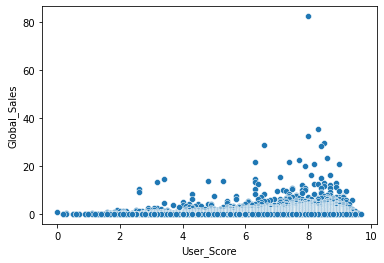

In [4]:
_ = sns.scatterplot(data=vg_sales_2016_w_scores, x='User_Score', y='Global_Sales')
plt.show()

In [14]:
vg_sales_2016_w_scores.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
vg_sales_2016_w_scores.isnull().any(axis = 1).sum()

9838

## Steam Tag Data

We are going to quickly make the edits we did in EDA again

In [5]:
steam_data_2019_tags = pd.read_csv("./csv_files/steamspy_tag_data.csv", index_col='appid')
tags_t = steam_data_2019_tags.transpose()
for col in tags_t.columns:
    maximum = tags_t[col].max()
    tags_t.loc[tags_t[col]<(maximum*.75), col] = 0
    tags_t.loc[tags_t[col]>=(maximum *.75), col] = 1
tags_tf = tags_t.transpose()
tags_tf

,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,4_player_local,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
appid,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1065570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1065650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
steam_data_2019 = pd.read_csv("./csv_files/steam.csv",index_col='appid')
steam_data_2019['rating_percent_pos'] = steam_data_2019['positive_ratings']/(steam_data_2019['negative_ratings'] + steam_data_2019['positive_ratings'])
steam_data_2019['release_date'] = pd.to_datetime(steam_data_2019['release_date'])
steam_data_2019

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,rating_percent_pos
appid,,,,,,,,,,,,,,,,,,
10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,0.973888
20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,0.839787
30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,0.895648
40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,0.826623
50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,0.947996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09,1.000000
1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69,0.888889
1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99,0.000000


In [13]:
merged_steam_data = pd.merge(
    steam_data_2019,
    tags_tf,
    on='appid',
    sort=True
)

merged_steam_data

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
appid,,,,,,,,,,,,,,,,,,,,,
10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,0,0,0,0,0,0,0,0,0,0
20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,0,0,0,0,0,0,0,0,0,0
30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,...,0,0,0,0,0,0,1,0,0,0
40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,0,0,0,0,0,0,0,0,0,0
50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,...,0,0,0,0,0,0,0,0,0,0
1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,...,0,0,0,0,0,0,0,0,0,0
1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,...,0,0,0,0,0,0,0,0,0,0


In [19]:
merged_steam_data.isnull().any(axis = 1).sum()

0

## Merging Sales and Steam Data

In the previous notebooks we looked at these two data sets seperately as we did above, and that is because there is only 937 entries that are in both data sets

In [16]:
merged_sales_steam_data = pd.merge(
    merged_steam_data,
    vg_sales_2016_w_scores,
    left_on = 'name',
    right_on='Name',
    sort=True
)

merged_sales_steam_data

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,...,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,15 Days,2015-04-01,1,House of Tales,HandyGames,windows,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Adventure;Casual;Indie,...,0.01,0.0,0.00,0.01,63.0,6.0,5.8,8.0,DTP Entertainment,NaN
1,18 Wheels of Steel: Extreme Trucker 2,2015-05-08,1,ValuSoft,ValuSoft;Play Hard Games,windows,0,Single-player,Simulation,Simulation;Driving,...,0.02,0.0,0.01,0.11,NaN,NaN,8.3,10.0,ValuSoft,E
2,40 Winks,2018-10-22,1,Eurocom,Piko Interactive LLC,windows,0,Single-player;Partial Controller Support,Action;Adventure,Action;Adventure;3D Platformer,...,0.12,0.0,0.02,0.31,NaN,NaN,NaN,NaN,NaN,NaN
3,7 Days to Die,2013-12-13,1,The Fun Pimps,The Fun Pimps Entertainment LLC,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Nudity;Violent;Gore;Action;Adventure;Indie;RPG...,Early Access;Survival;Zombies,...,0.08,0.0,0.02,0.14,45.0,16.0,5.9,140.0,The Fun Pimps Entertainment LLC,M
4,7 Days to Die,2013-12-13,1,The Fun Pimps,The Fun Pimps Entertainment LLC,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Nudity;Violent;Gore;Action;Adventure;Indie;RPG...,Early Access;Survival;Zombies,...,0.02,0.0,0.00,0.05,35.0,17.0,5.2,74.0,The Fun Pimps Entertainment LLC,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,de Blob 2,2017-06-22,1,Blue Tongue Entertainment;Blitworks,THQ Nordic,windows,0,Single-player;Local Multi-Player;Shared/Split ...,Action;Adventure;Indie,Action;Adventure;Indie,...,0.06,0.0,0.02,0.18,79.0,20.0,8.1,26.0,Blue Tongue Entertainment,E10+
933,de Blob 2,2017-06-22,1,Blue Tongue Entertainment;Blitworks,THQ Nordic,windows,0,Single-player;Local Multi-Player;Shared/Split ...,Action;Adventure;Indie,Action;Adventure;Indie,...,0.04,0.0,0.01,0.15,77.0,54.0,7.5,23.0,Blue Tongue Entertainment,E10+
934,de Blob 2,2017-06-22,1,Blue Tongue Entertainment;Blitworks,THQ Nordic,windows,0,Single-player;Local Multi-Player;Shared/Split ...,Action;Adventure;Indie,Action;Adventure;Indie,...,0.02,0.0,0.01,0.11,75.0,11.0,8.2,6.0,Halfbrick Studios,E
935,nail'd,2010-11-30,1,Techland,Deep Silver,windows,0,Single-player;Partial Controller Support,Racing,Racing;Offroad;Action,...,0.02,0.0,0.02,0.12,66.0,36.0,6.2,13.0,Techland,E10+


In [20]:
merged_sales_steam_data.isnull().any(axis = 1).sum()

282

In [22]:
print(merged_sales_steam_data.isnull().sum())

name              0
release_date      0
english           0
developer         0
publisher         0
               ... 
Critic_Count    203
User_Score      195
User_Count      195
Developer       104
Rating          152
Length: 405, dtype: int64
